# Classifying Organic and Recyclable Wastes

In this notebook, we classify images as organic wastes or recyclable wastes. 
The training dataset used is made up of 22500 images with 12565 images of organic materials and 9999 images of recyclable materials. The testing dataset is made up of 1401 images of organic wastes and 1112 images of recyclable wastes. 

The dataset was originally prepared by Sashaank Sekar and it was published on Kaggle.com. The dataset can be directly downloaded from https://www.kaggle.com/techsash/waste-classification-data. 



# Importing Libraries

We start the code by importing some libraries that we will be using in the code 

In [1]:
#Matplotlib is used to create graphs and visualize our images 
import matplotlib.pyplot as plt

#Numpy is is used to deal with our data that takes the form of arrays 
import numpy as np

#OS stands for operating system and it is used to read the image files that we need to use in our code
import os

#Pprint is pretty print and it is used to print text in an indented and farmatted way
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
#Joblib is used to save the processed data that our code generates
#This allows us to run the code much faster when we restart our code
import joblib

#imread is used to read images and resize is used to resize images 
from skimage.io import imread
from skimage.transform import resize

# Importing the Dataset into Python 

The dataset, at the moment, is in folders as png or jpg files. Now, we need to import this dataset into our code so we can use it, transform it, and manipulate it. 

First, we will import the training dataset that we will use to build and train our model.  

In [3]:
#Create a dictionary that will save all the information needed from the images 
data_train = dict()

data_train['label'] = []
data_train['filename'] = []
data_train['data'] = []   

#pklname is the name of the python file that will save our data. 
#We will use it if we ever need to restart the code. 
pklname = "waste_images_train"

#Choose the width and height of the images. 
width = 80
height = 80 

#Create the actual pkl file that will save the data. 
pklname = f"{pklname}_{width}x{height}px.pkl"

#src is the name of the folder that contains our data 
src = "TRAIN"

#Include is a list of the names of the folders that we need inside the src folder
include = {'O', 'R'}

#Read all the images in the src folder, resize them, and write them to the pkl file
for subdir in os.listdir(src):
    #If the folder is in "include", we will read what is in it. 
    if subdir in include:
        print(subdir)
        current_path = os.path.join(src, subdir)
 
        for file in os.listdir(current_path):
            #If the file is a jpg or png file, we will read it. 
            if file[-3:] in {'jpg', 'png'}:
                #Read the image file
                im = imread(os.path.join(current_path, file))
                #Resize the image
                im = resize(im, (width, height)) #[:,:,::-1]
                #Add the label of the image (in this case, if the image is O or R)
                data_train['label'].append(subdir)
                #Add the filename to know which image this is
                data_train['filename'].append(file)
                #Add the data of the image (i.e. the pixels of the image)
                data_train['data'].append(im)
 
        #save all the data in a pkl file 
        joblib.dump(data_train, pklname)

O
R


Then, we will import our test dataset. This dataset will be used to check the accuracy and performance of our model. The code below is very similar to the code above. The only changes are related to reading the TEST folder instead of the TRAIN folder. 

In [4]:
data_test = dict()

data_test['label'] = []
data_test['filename'] = []
data_test['data'] = []   
     
pklname = "waste_images_test"
width = 80
height = 80 

pklname = f"{pklname}_{width}x{height}px.pkl"
src = "TEST"
include = {'O', 'R'}

# read all images in PATH, resize and write to DESTINATION_PATH
for subdir in os.listdir(src):
    if subdir in include:
        print(subdir)
        current_path = os.path.join(src, subdir)
 
        for file in os.listdir(current_path):
            if file[-3:] in {'jpg', 'png'}:
                im = imread(os.path.join(current_path, file))
                im = resize(im, (width, height)) #[:,:,::-1]
                data_test['label'].append(subdir)
                data_test['filename'].append(file)
                data_test['data'].append(im)
 
        joblib.dump(data_test, pklname)

O
R


# Checking the Inside of the Dataset

So, our data has been imported into the code. Now, we want to see what exactly is in this data. 

In [5]:
from collections import Counter
width = 80

#Load the data from the pkl file. 
#Note: When restarting the code later on, there is no need to run the previous two blocks of code. 
#You can just load the data from the pkl files. 
data_train = joblib.load(f'{"waste_images_train"}_{width}x{width}px.pkl')

#Print the number of images we have. In this case, we should have 22 564 images 
print('number of samples: ', len(data_train['data']))

#Print the information available in the files. In this case, we have the label, filename, and data. 
#Other pkl files can have descriptions, source of data etc. 
print('keys: ', list(data_train.keys()))

#Print the shape of the image. Our image will 80 by 80 pixels by 3 colors (for R,G,B values)
print('image shape: ', data_train['data'][0].shape)

#Print the labels that are available. In our case, the labels are O and R (for organic and recyclable)
#Other data can have more than two labels for example types of flowers, types of dogs, faces etc. 
print('labels:', np.unique(data_train['label']))

#Count how many O and R images we have. 
Counter(data_train['label'])

number of samples:  22564
keys:  ['label', 'filename', 'data']
image shape:  (80, 80, 3)
labels: ['O' 'R']


Counter({'O': 12565, 'R': 9999})

In [6]:
#The code below is identical to the one above, except that we are using the testing data instead of the training data 

data_test = joblib.load(f'{"waste_images_test"}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data_test['data']))
print('keys: ', list(data_test.keys()))
print('image shape: ', data_test['data'][0].shape)
print('labels:', np.unique(data_test['label']))
 
Counter(data_test['label'])

number of samples:  2513
keys:  ['label', 'filename', 'data']
image shape:  (80, 80, 3)
labels: ['O' 'R']


Counter({'O': 1401, 'R': 1112})

# Visualizing the Data

At this stage, we have resized the images and figured out how many images we have. Now, we can use the code below to show sample images and see how they look like. 

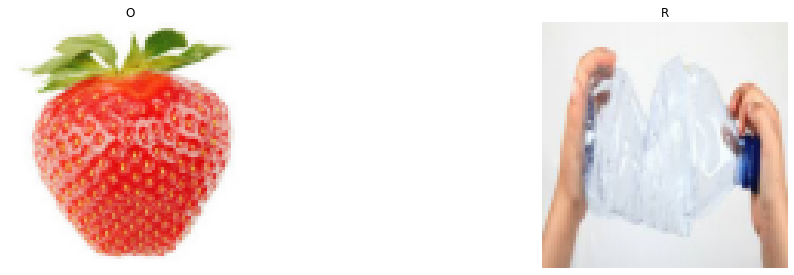

In [7]:
# use np.unique to get all unique values in the list of labels. In our case, we have two labels, O and R. 
labels = np.unique(data_train['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data_train['label'].index(label)
     
    ax.imshow(data_train['data'][idx])
    ax.axis('off')
    ax.set_title(label)

# Dividing the Data into X and Y 

Now that our data is loaded and looks like it is working, we need to decide what are the Xs and what are the Ys. 

Remember:
* The Xs are the features that we use to make a prediction. In this case, the actual images. 
* The Ys are what we are trying to predict. In this case, whether an image is O (organic) or R (recyclable)
    
Note: For now, we will only be using the training dataset. The testing dataset will only be used at the very end. 

In [8]:
X = data_train['data']
print("Number of Samples in X: ", len(X))
y = data_train['label']
print("Number of Samples in Y: ", len(y))

Number of Samples in X:  22564
Number of Samples in Y:  22564


# Preprocessing the Data 

It would be great if we can just use the Xs (images) as they are and input them into a model. But, unfortunately, this is not possible. We need to "preprocess" the images to make the data easier for the model to read and analyze. 

There are many ways of preprocessing data. As a matter of fact, preprocessing data or feature engineering is a HUGE part of what AI engineers and researchers do. However, in this case, we will be using three preprocessing techniques:
1. RGB2GrayTransformer: This technique turns the images into grayscale instead of RGB 
2. HogTransformer: HOG stands for Histogram of Oriented Gradients. HOGs are used for feature reduction, in other words: for lowering the complexity of the problem. By using the HOG Transform, the images will look like the image below: 

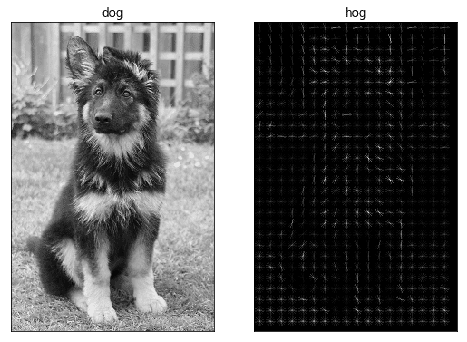

3. StandardScaler: This scaler normalizes the data. 

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from skimage.feature import hog
import skimage

#The code below creates the RGB2GrayTransformer
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
#The code below creates the HOGTransformer
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [10]:
from sklearn.preprocessing import StandardScaler, Normalizer

#The code below creates an instance of every transformer. 
#These are the specific transformers we will be using on the images. 

grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()

In [11]:
#We will use fit_transform and use every preprocessing technique one at a time. 
X_gray = grayify.fit_transform(X)
X_hog = hogify.fit_transform(X_gray)
X_prepared = scalify.fit_transform(X_hog)
 
print(X_prepared.shape)

C:\Users\cathe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
C:\Users\cathe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


(22564, 576)


# Splitting the Data into Training and Testing Datasets

Now it is time to split our training dataset into training and testing dataset. 

Note: This step might be confusing because originally, we have a training dataset and a testing dataset, so why split the training dataset? Well, that's because we will be experimenting with different models: 

1. Portion of Training Data: This is the data we will be using to "train" and create a model. 
2. Testing Data extracted from Training Data: We will test our model on this dataset. So, every model we create from the above dataset will be tested on this dataset and the accuracy scores will be compared and the best model will be chosen. This dataset will be called the Validation Dataset. 
3. Testing dataset: The best model that worked on the dataset above will be used on this dataset so we can get the "most accurate" accuracy level. 

In [12]:
from sklearn.model_selection import train_test_split
 
X_train, X_val, y_train, y_val = train_test_split(
    X_prepared, 
    y, 
    test_size=0.2,           #The testing dataset is 20% of the training dataset
    shuffle=True,            #The dataset is shuffled so you do not get a training dataset that is mostly O or mostly R 
    random_state=42,
)

The code below is not at all necessary. It is just there to show you how the training and validation datasets have been split and distributed. 

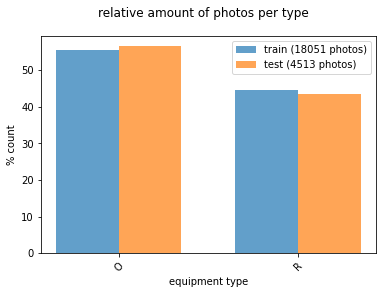

In [13]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_val, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_val))
]);

# Building the Simplest SVM Model Possible 

Alright! Our data is loaded, processed, and split! Now it is time to build a model. The first model we will build is an extremely simple Support Vector Machine model. We will be using the default parameters and changing nothing. 

In [14]:
from sklearn.svm import SVC

model_svc = SVC(verbose = True)                         #Create a model
model_svc.fit(X_train, y_train)                         #Train the model

[LibSVM]

SVC(verbose=True)

## Checking the Accuracy of the Model

So, the model is now ready, it's time to check how accurate it is. 

### Accuracy on Training Dataset

First, we will check the accuracy of the model on the training set. What that means is that we will make the model predict the class of the samples of the training set. 
Because the model has been trained on this dataset, we would expect a very high accuracy. 

In [15]:
y_pred_train = model_svc.predict(X_train)        #Predict values using the training dataset

In [16]:
from sklearn.metrics import accuracy_score

#Compare the values predicted by the model to the actual/true values
accuracy_score(y_pred_train, y_train) 

0.89607223976511

Text(8.160000000000004, 0.5, 'predicted label')

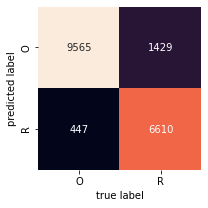

In [17]:
#Plot a confusion matrix to see what part the model was worst at. 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(3,3))
mat = confusion_matrix(y_train, y_pred_train) #These are the values that you need to change to graph another confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(data_train['label']), yticklabels=np.unique(data_train['label']))
plt.xlabel('true label')
plt.ylabel('predicted label')

So, the accuracy of the model on the training set is relatively high (89.6%). 

### Accuracy on Validation Dataset

Now, let's check it's accuracy on the validation set. 

In [18]:
y_pred_val = model_svc.predict(X_val)        #Predict values using the validation dataset

In [19]:
#Compare the values predicted by the model to the actual/true values
accuracy_score(y_val, y_pred_val)

0.8183026811433636

Text(8.160000000000004, 0.5, 'predicted label')

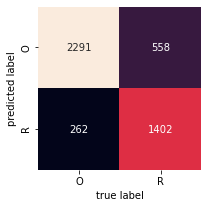

In [20]:
#Plot a confusion matrix to see what part the model was worst at. 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(3,3))
mat = confusion_matrix(y_val, y_pred_val) #These are the values that you need to change to graph another confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(data_train['label']), yticklabels=np.unique(data_train['label']))
plt.xlabel('true label')
plt.ylabel('predicted label')

On the validation dataset, the accuracy was lower, but still an acceptable 81.8%. 

### Accuracy on Testing Dataset

Now, let's see how our model does on the actual testing dataset. 

In [21]:
#---------------------------------------------------------------------------------------------#
# NOTE: We did not previously preprocess our testing dataset, so we are doing that now.       #
#---------------------------------------------------------------------------------------------#

#First, choose the Xs and Ys 
X_test = data_test['data']
y_test = data_test['label']

#We will use fit_transform and use every pre-processing technique one at a time. 
X_gray = grayify.fit_transform(X_test)
X_hog = hogify.fit_transform(X_gray)
X_prepared_test = scalify.fit_transform(X_hog)
 
print(X_prepared_test.shape)

C:\Users\cathe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.


(2513, 576)


In [22]:
y_pred_test = model_svc.predict(X_prepared_test)   #predict values using the testing dataset

In [23]:
#Compare the values predicted by the model to the actual/true values
accuracy_score(y_test, y_pred_test)

0.8165539196179865

Text(8.160000000000004, 0.5, 'predicted label')

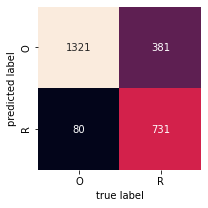

In [24]:
#Plot a confusion matrix to see what part the model was worst at. 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(3,3))
mat = confusion_matrix(y_test, y_pred_test) #These are the values that you need to change to graph another confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(data_train['label']), yticklabels=np.unique(data_train['label']))
plt.xlabel('true label')
plt.ylabel('predicted label')

The accuracy on our testing dataset is actually still relatively reasonable at 81.6%

# Adding Parameters to the SVM Model

The model we created above used all the default values for the SVM/SVC model. However, when building AI models, researchers experiment with different parameters and use the combination of parameters that result in the best model. 

SVC models in sklearn have the following parameters that can be changed: 
* **C**: default = 1.0 <br /> 
  Regularization parameter. The strength of the regularization is inversely proportional to C.
* **kernel**: default = 'rbf' <br /> 
  Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.
* **degree**: defaul = 3 <br /> 
  Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
* **gamma**: default = 'scale' <br /> 
  Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. <br />
  if gamma ='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma, <br />
  if ‘auto’, uses 1 / n_features.
  
The above are only some of the parameters that can be changed for SVCs. For a full list, check out the documentation link below: 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

In this section, we will see how we can change some of these parameters and we will experiment with different combinations to see which one is best. 

So, what we should do is train different models with different parameters on the training dataset with 22500 images. However, this is a very time consuming task. So, instead, just for demonstration purposes, we will use our testing dataset that has 2500 images to train different models. 

Nonetheless, when building your own models, try whenever possible to use the larger training dataset. 

In [25]:
#Making the testing dataset the training dataset
data_train_small = joblib.load(f'{"waste_images_test"}_{width}x{width}px.pkl')

#Printing some stats of the smaller training dataset
print('number of samples: ', len(data_train_small['data']))
print('keys: ', list(data_train_small.keys()))
print('image shape: ', data_train_small['data'][0].shape)
print('labels:', np.unique(data_train_small['label']))
 
Counter(data_train_small['label'])

number of samples:  2513
keys:  ['label', 'filename', 'data']
image shape:  (80, 80, 3)
labels: ['O' 'R']


Counter({'O': 1401, 'R': 1112})

In [26]:
#Deciding the Xs and Ys 
X_small = data_train_small['data']
print("Number of Samples in X: ", len(X_small))
y_small = data_train_small['label']
print("Number of Samples in Y: ", len(y_small))

Number of Samples in X:  2513
Number of Samples in Y:  2513


In [27]:
#We will use fit_transform and use every pre-processing technique one at a time. 
X_gray_small = grayify.fit_transform(X_small)
X_hog_small = hogify.fit_transform(X_gray_small)
X_prepared_small = scalify.fit_transform(X_hog_small)
 
print(X_prepared_small.shape)

C:\Users\cathe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.


(2513, 576)


In [28]:
#Splitting the dataset into training and testing dataset
X_train_small, X_val_small, y_train_small, y_val_small = train_test_split(
    X_prepared_small, 
    y_small, 
    test_size=0.2, #The testing dataset is 20% of the training dataset
    shuffle=True, #The dataset is shuffled so you do not get a training dataset that is mostly O or mostly R 
    random_state=42,
)

So, we've set up the new smaller training dataset. Now, we can create our model. <br />
Note that you can change the values of C and kernel below to try different combinations and see what works best. 

In [29]:
model_svc_para = SVC(C = 0.7, kernel = "linear", verbose = True)                #Create a model
model_svc_para.fit(X_train_small, y_train_small)                                #Train the model

[LibSVM]

SVC(C=0.7, kernel='linear', verbose=True)

### Accuracy on Training Dataset

In [30]:
y_pred_train_small = model_svc.predict(X_train_small)                           #Predict values using the training dataset

In [31]:
#Compare the values predicted by the model to the actual/true values
accuracy_score(y_train_small, y_pred_train_small)

0.8124378109452737

### Accuracy on Testing Dataset

In [32]:
y_pred_val_small = model_svc.predict(X_val_small)                               #Predict values using the testing dataset

In [33]:
#Compare the values predicted by the model to the actual/true values
accuracy_score(y_val_small, y_pred_val_small)

0.8330019880715706

**Note**: By trying different values for C and kernel, you will get different accuracies. Some accuracies will be higher, others will be lower. However, always remember that: <br /> <br />
              **BETTER DATA in more important than BETTER ALGORITHMS**

# Saving Your Model for Future Use

So, we have tested different models, and now we have the best one. It is time to save it so we can use it any time we want without having to recreate it. 

In [34]:
filename = 'final_model.sav'
joblib.dump(model_svc, filename)

['final_model.sav']

# Loading Your Model From Your Computer

In this section, we will load the model that we saved in the previous section. 

In [35]:
filename = 'final_model.sav'
loaded_model = joblib.load(filename)

# Using Your Model to Predict New Images

In this section, we will use the model we created to predict whether a new image is organic or recyclable. 

Remember, that we will be using an image directly from our computer. So, the image needs to be preprocessed just like the images of the training and testing datasets. 

In [36]:
#Create an empty list where the processed data will be saved 
test_image = []

#Add the path of the image you want to test
image_path = "TEST\\O\\O_13553.jpg"

#Read the image and resize it
im = imread(image_path)
im = resize(im, (80, 80))

#Save the image in the image list
test_image.append(im)

Text(0.5, 1.0, 'Image to Predict')

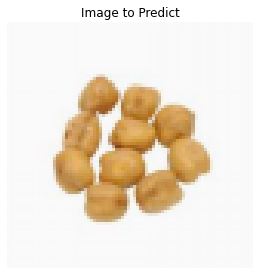

In [37]:
#Set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, 1)
fig.set_size_inches(15,4)
fig.tight_layout()
 
#Show the image with an appropriate title    
axes.imshow(im)
axes.axis('off')
axes.set_title("Image to Predict")

In [38]:
#Process the image
im_gray = grayify.fit_transform(test_image)
im_hog = hogify.fit_transform(im_gray)
im_prepared = scalify.fit_transform(im_hog)

#Check that the shape of the data makes sense 
print(im_prepared.shape)

(1, 576)


In [39]:
#Use the model to predict the label of the image 
image_pred = loaded_model.predict(im_prepared) 
print(image_pred)

['O']


------------------------------------------------------------------------------------------------------------------------------

# EXTRAS

## Building the Simplest Random Forest Classifier Model Possible 

In this section we build a second model with a different algorithm. The model we will build is an extremely simple Random Forest Classifier model. We will be using the default parameters and changing nothing. 

In [40]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=100)
model_forest.fit(X_train, y_train) 

RandomForestClassifier()

### Accuracy on Validation Dataset

In [41]:
y_pred_val = model_forest.predict(X_val)

#Compare the values predicted by the model to the actual/true values
accuracy_score(y_val, y_pred_val)

0.7764236649678706

Text(8.160000000000004, 0.5, 'predicted label')

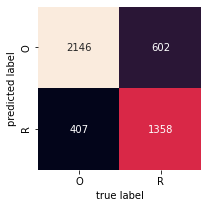

In [42]:
#Plot a confusion matrix to see what part the model was worst at. 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(3,3))
mat = confusion_matrix(y_val, y_pred_val) #These are the values that you need to change to graph another confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(data_train['label']), yticklabels=np.unique(data_train['label']))
plt.xlabel('true label')
plt.ylabel('predicted label')

### Accuracy on Testing Dataset

Now, let's see how our model does on the actual testing dataset.

In [43]:
y_pred_test = model_forest.predict(X_prepared_test)

In [44]:
#Compare the values predicted by the model to the actual/true values
accuracy_score(y_test, y_pred_test)

0.807799442896936

Text(8.160000000000004, 0.5, 'predicted label')

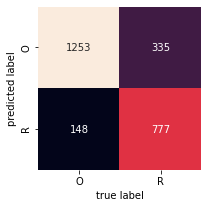

In [45]:
#Plot a confusion matrix to see what part the model was worst at. 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(3,3))
mat = confusion_matrix(y_test, y_pred_test) #These are the values that you need to change to graph another confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(data_train['label']), yticklabels=np.unique(data_train['label']))
plt.xlabel('true label')
plt.ylabel('predicted label')